In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
Base.prepare(autoload_with=engine, reflect=True)
# reflect the tables
Base.classes.keys()


['measurement', 'station']

In [7]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_date

('2017-08-23',)

Text(0.5, 0, 'Date')

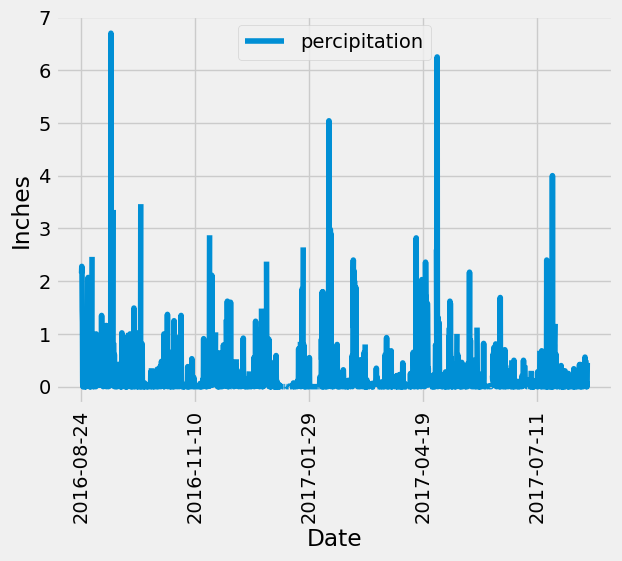

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# twelve_recent = session.query(measurement.date).order_by(measurement.date.desc()).limit(12).all()
# twelve_recent
# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
twelve_months= session.query(measurement.date, measurement.prcp).filter(measurement.date > previous_year).all()
twelve_months

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df_twelve = pd.DataFrame(twelve_months)
df_twelve_rename = df_twelve.rename(columns={"prcp":"percipitation"})
df_twelve_rename

# Sort the dataframe by date
df_sorted = df_twelve_rename.sort_values("date")
df_sorted

# Use Pandas Plotting with Matplotlib to plot the data
# plt.scatter("date", "percipitation", marker="o", facecolors="red", edgecolors="black")
# plt.show()
df_sorted.plot("date", "percipitation", rot=90)
plt.ylabel("Inches")
plt.xlabel("Date")


In [12]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sorted.describe()

,percipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to calculate the total number of stations in the dataset
amount_stations = session.query(func.count(station.station)).first()
amount_stations

(9,)

In [14]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [25]:
analyse_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.date < 10/30/2015).filter(measurement.date > 10/30/2011).all()
analyse_temp

[(None, None, None)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
analyse_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == 'USC00519281').all()
analyse_temp

[(54.0, 85.0, 71.66378066378067)]

In [16]:
twelve= session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > previous_year).all()
twelve

[(77.0,),
 (80.0,),
 (80.0,),
 (75.0,),
 (73.0,),
 (78.0,),
 (77.0,),
 (78.0,),
 (80.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (73.0,),
 (74.0,),
 (80.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (76.0,),
 (79.0,),
 (75.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (78.0,),
 (78.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (78.0,),
 (79.0,),
 (79.0,),
 (77.0,),
 (80.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (79.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (72.0,),
 (71.0,),
 (77.0,),
 (79.0,),
 (78.0,),
 (79.0,),
 (77.0,),
 (79.0,),
 (77.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (78.0,),
 (77.0,),
 (74.0,),
 (75.0,),
 (76.0,),
 (73.0,),
 (76.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (74.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (75.0,),
 (71.0,),
 (63.0,),
 (70.0,),
 (68.0,),
 (67.0,),
 (77.0,),
 (74.0,),
 (77.0,),
 (76.0,),
 (76.0,),
 (75.0,),
 (76.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (74.0,),
 (75.0,),
 (73.0,),
 (75.0,),
 (73.0,),
 (73.0,),
 (74.0,),


<Axes: ylabel='Frequency'>

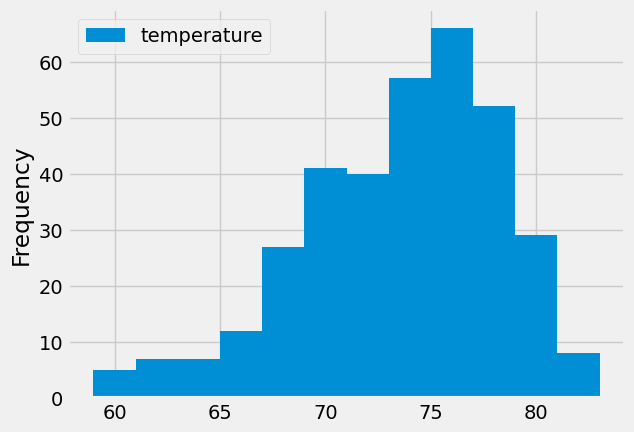

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve= session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date > previous_year).all()

df_twelve_temp = pd.DataFrame(twelve)
df_twelve_temp_rename = df_twelve_temp.rename(columns={"tobs":"temperature"})
df_twelve_temp_rename

# Sort the dataframe by date
# df_temp_sorted = df_twelve_temp_rename.sort_values("date")
# df_temp_sorted

df_twelve_temp_rename.plot.hist(bins=12)


# Close Session

In [18]:
# Close Session
session.close()